In [4]:
include("GP.jl");

using PyPlot

## Kernels

### Gaussian Radial Basis Function / Exponentiated Quadratic
$k(x_i,x_j; \theta) = \sigma^2\exp\left(-\frac{2}{l^2}\|x_i - x_j\|^2\right)$

Hyperparameters, $\theta = \{l,\sigma^2\}$ correspond to lengthscale and variance of kernel

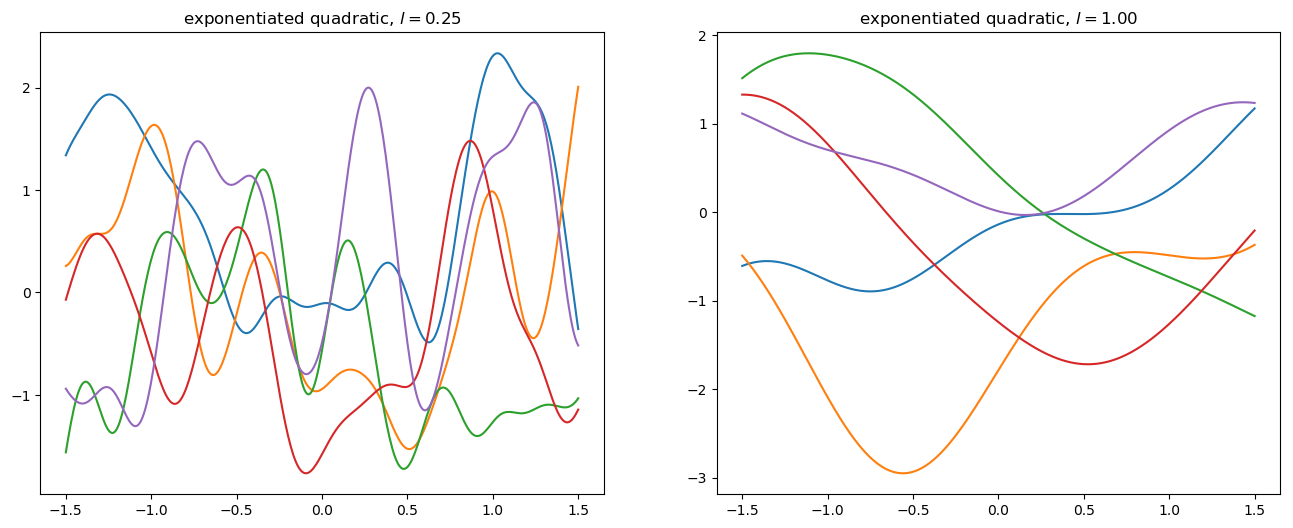

In [5]:
x = linspace(-1.5,1.5,400)

params = Dict("lengthscale" => 0.25, "variance" => 1.)
                                
figure(figsize=(16,6))

subplot(121)

for _ ∈ 1:5
    plot(x,sample_kernel(x,𝑘 = kern_rbf,θ = params))
end

title(L"exponentiated quadratic, $l = 0.25$")


subplot(122)

params["lengthscale"] = 1.

for _ ∈ 1:5
    plot(x,sample_kernel(x,𝑘 = kern_rbf,θ = params))
end

title(L"exponentiated quadratic, $l = 1.00$")
; # suppress text output

### Periodic Kernel

$k(x_i,x_j;\theta) = \sigma^2\exp\left(-\frac{2}{l^2}\sin^2(\frac{\pi}{\omega}\|x_i-x_j\|)\right)$

Hyperparameters, $\theta = \{\omega,l,\sigma^2\}$ correspond to period, lengthscale and variance of kernel respectively.

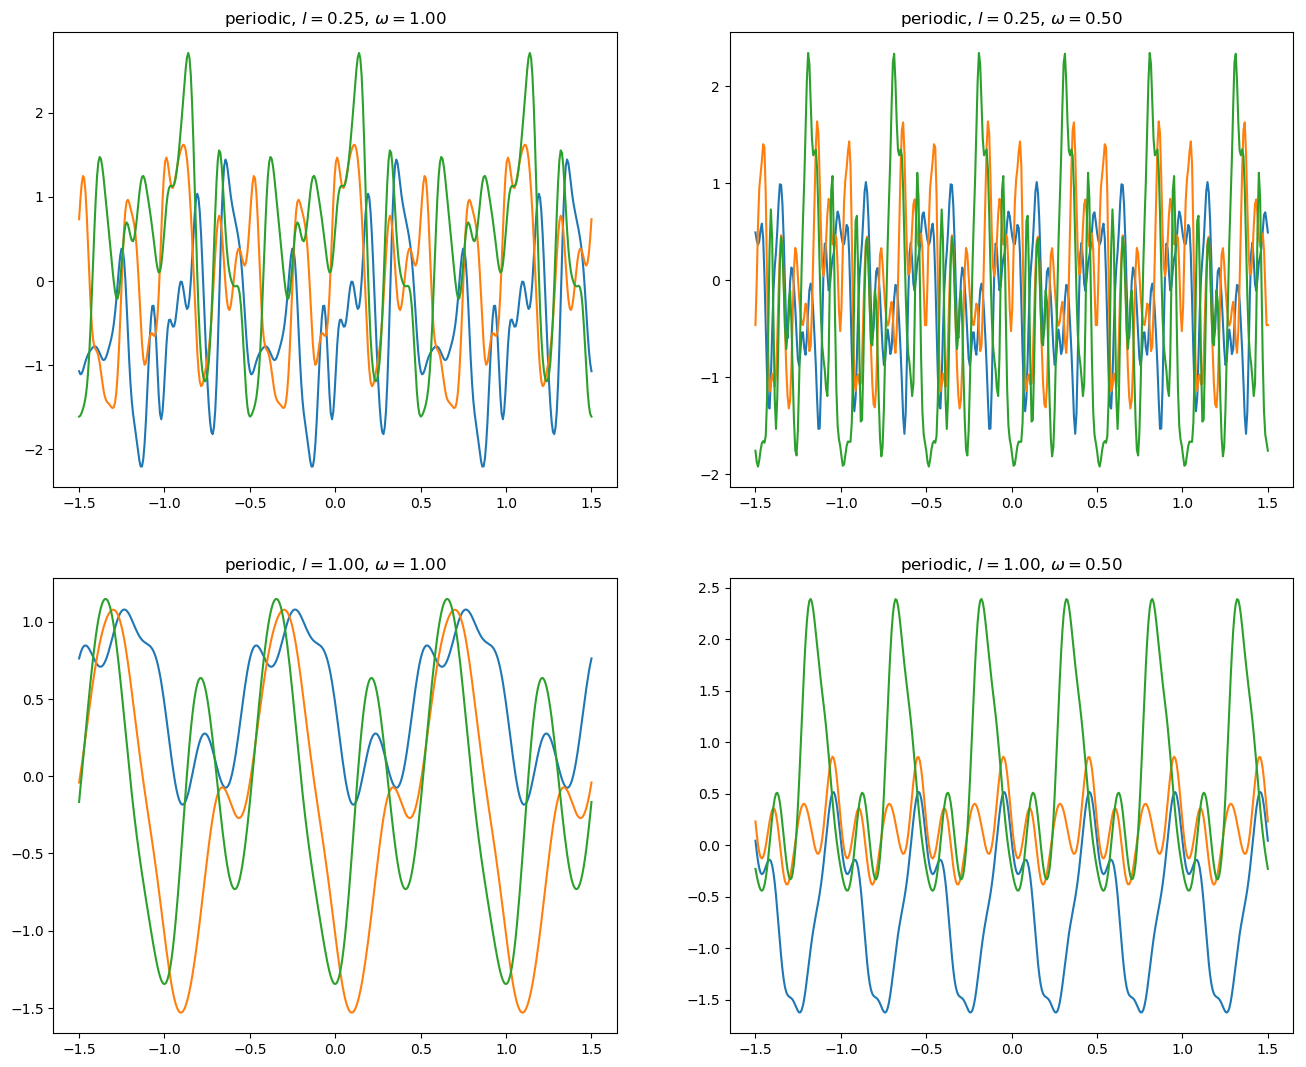

PyObject Text(0.5,1,'periodic, $l=1.00$, $\\omega=0.50$')

In [6]:
figure(figsize=(16,13))

subplot(221)

params = Dict("period" => 1., "lengthscale" => 0.25, "variance" => 1.)

for i ∈ 1:3
    plot(x,sample_kernel(x, 𝑘 = kern_periodic, θ = params))
end

title(L"periodic, $l=0.25$, $\omega=1.00$")


subplot(222)

params = Dict("period" => 0.5, "lengthscale" => 0.25, "variance" => 1.)

for i ∈ 1:3
    plot(x,sample_kernel(x, 𝑘 = kern_periodic, θ = params))
end

title(L"periodic, $l=0.25$, $\omega=0.50$")


subplot(223)

params = Dict("period" => 1., "lengthscale" => 1., "variance" => 1.)

for i ∈ 1:3
    plot(x,sample_kernel(x, 𝑘 = kern_periodic, θ = params))
end

title(L"periodic, $l=1.00$, $\omega=1.00$")

subplot(224)

params = Dict("period" => 0.5, "lengthscale" => 1., "variance" => 1.)

for i ∈ 1:3
    plot(x,sample_kernel(x, 𝑘 = kern_periodic, θ = params))
end

title(L"periodic, $l=1.00$, $\omega=0.50$")

### Exponential Kernel

$k(x_i,x_j; \theta) = \sigma^2\exp\left(\frac{1}{l}\|x_i - x_j\|\right)$

Hyperparameters, $\theta = \{l,\sigma^2\}$ correspond to lengthscale and variance of kernel respectively.

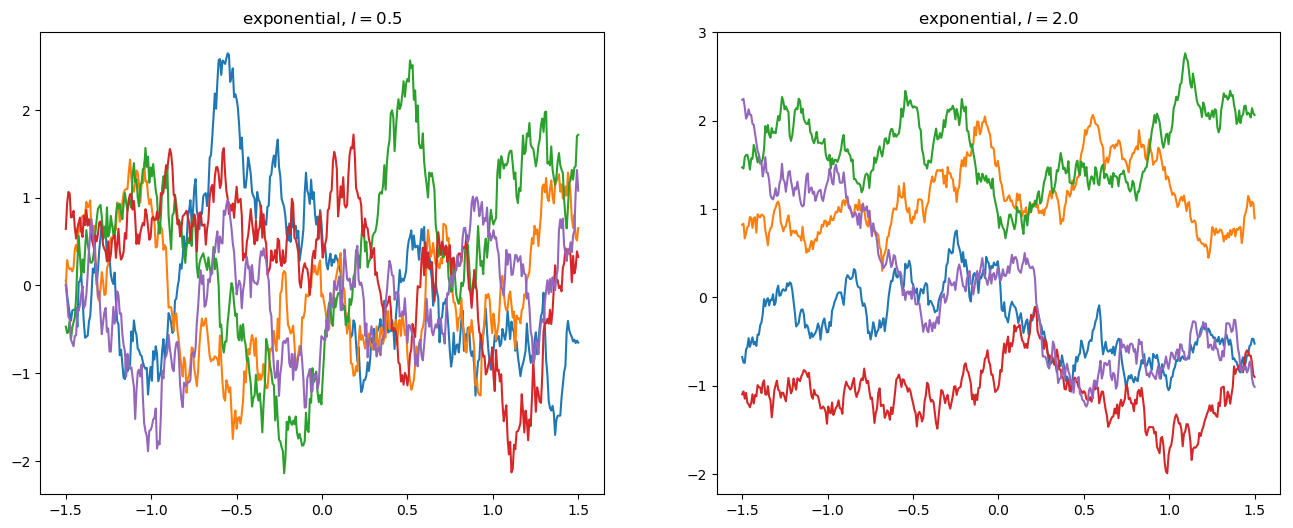

PyObject Text(0.5,1,'exponential, $l=2.0$')

In [7]:
figure(figsize=(16,6))

subplot(121)

params = Dict("lengthscale" => 0.5, "variance" => 1.)

for _ ∈ 1:5
    plot(x,sample_kernel(x, 𝑘 = kern_exponential, θ = params))
end

title(L"exponential, $l=0.5$")


subplot(122)

params = Dict("lengthscale" => 2., "variance" => 1.)

for _ ∈ 1:5
    plot(x,sample_kernel(x, 𝑘 = kern_exponential, θ = params))
end

title(L"exponential, $l=2.0$")


### $\gamma$-exponential Kernel

$k(x_i,x_j; \theta) = \sigma^2\exp\left(\frac{1}{l^\gamma}\|x_i - x_j\|^\gamma\right)$

Hyperparameters, $\theta = \{\gamma, l,\sigma^2\}$ correspond to exponent, lengthscale and variance of kernel respectively.

Note that when $\gamma = 1$, the kernel is the exponential kernel, and when $\gamma = 2$ it is approximately the exponentiated quadratic.

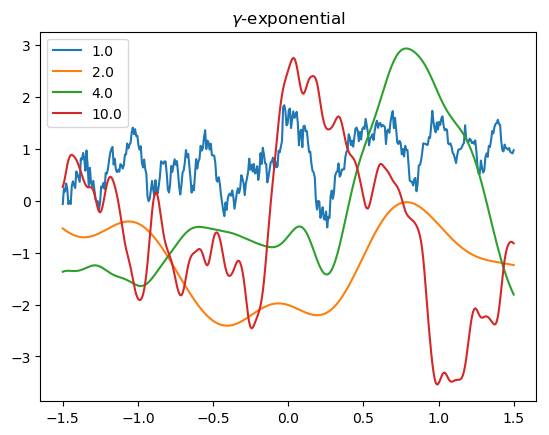

PyObject <matplotlib.legend.Legend object at 0x7f819bf886a0>

In [8]:
params = Dict("exponent" => 1.,"lengthscale" => 0.5, "variance" => 1.)

figure()
for params["exponent"] ∈ [1.,2.,4.,10.]
    plot(x,sample_kernel(x, 𝑘 = kern_exponential_𝛾, θ = params))
end
title(L"$\gamma$-exponential")
legend(labels=[1.,2.,4.,10.])

### Matern Kernels

$k(x_i,x_j; \theta) = \sigma^2\frac{2^{1-\nu}}{\Gamma(\nu)}\left(\frac{\sqrt{2\nu}}{l}\|x_i-x_j\|\right)^\nu K_\nu\left(\frac{\sqrt{2\nu}}{l}\|x_i-x_j\|\right)$

Hyperparameters, $\theta = \{\nu, l, \sigma^2\}$ correspond to Matérn order, lengthscale and variance of kernel respectively.

Note that when $\nu = \frac{1}{2}$, the kernel is the exponential kernel.

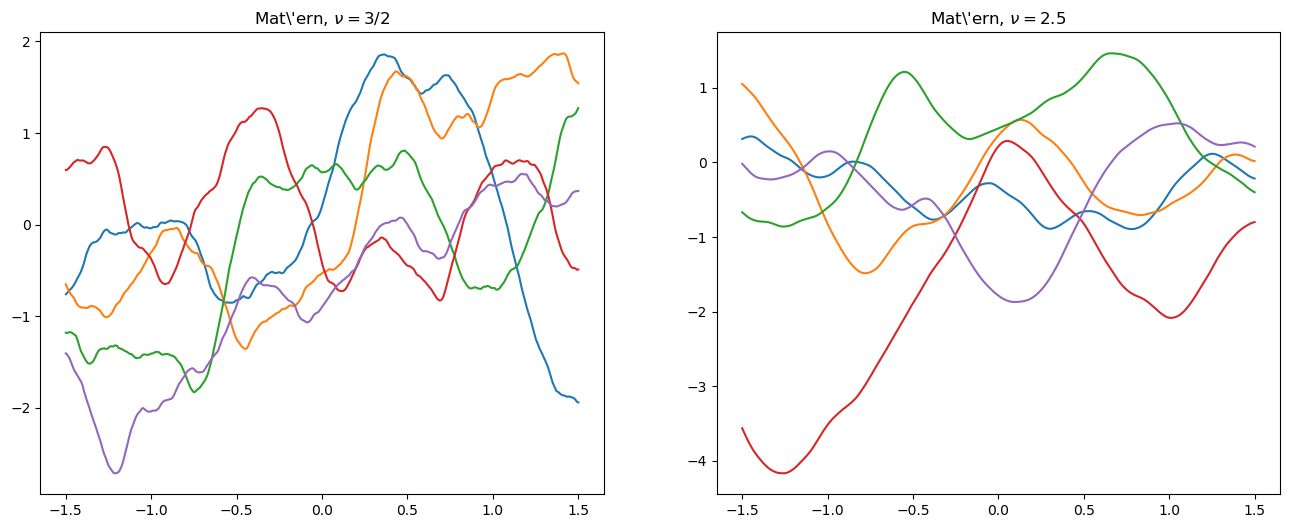

PyObject Text(0.5,1,"Mat\\'ern, $\\nu=2.5$")

In [9]:
figure(figsize=(16,6))

subplot(121)

params = Dict("nu" => 1.5, "lengthscale" => 0.5, "variance" => 1.)

for _ ∈ 1:5
    plot(x,sample_kernel(x, 𝑘 = kern_matern, θ = params))
end

title(L"Mat\'ern, $\nu=3/2$")


subplot(122)

params = Dict("nu" => 2.5, "lengthscale" => 0.5, "variance" => 1.)

for _ ∈ 1:5
    plot(x,sample_kernel(x, 𝑘 = kern_matern, θ = params))
end

title(L"Mat\'ern, $\nu=2.5$")

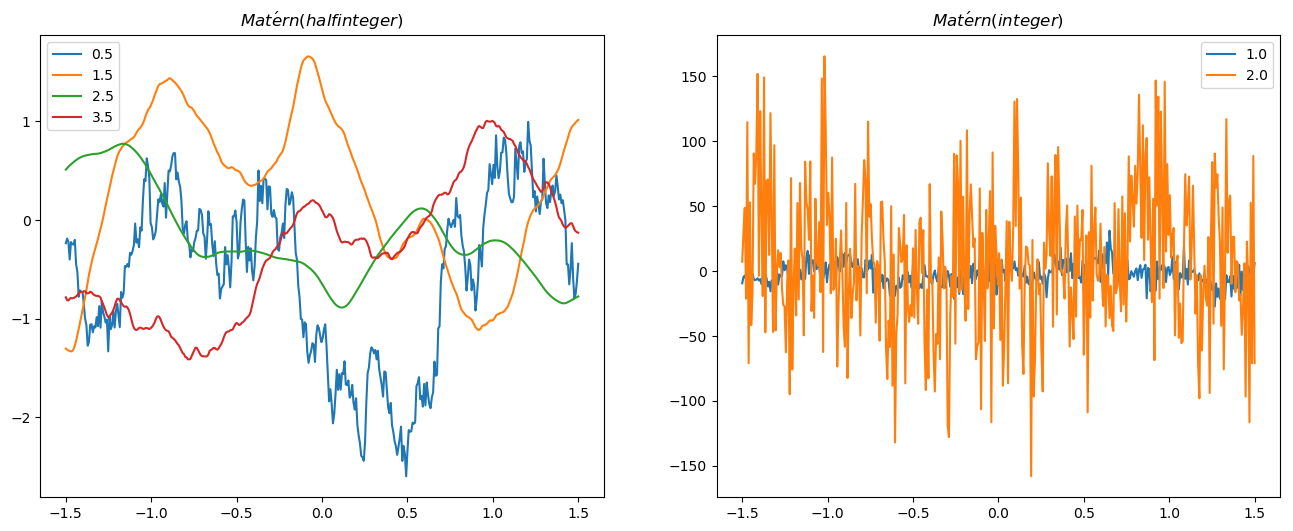

PyObject <matplotlib.legend.Legend object at 0x7f819be6e5f8>

In [10]:
params = Dict("nu" => 0.5, "lengthscale" => 0.5, "variance" => 1.)
figure(figsize=(16,6))

subplot(121)
for params["nu"] ∈ [1./2.,3./2.,5./2.,7./2.]
    plot(x, sample_kernel(x, 𝑘 = kern_matern, θ = params))
end
title(L"Mat\'ern (half integer)")
legend(labels=[1./2.,3./2.,5./2.,7./2.])


subplot(122)

for params["nu"] ∈ [1.,2.]
    plot(x, sample_kernel(x, 𝑘 = kern_matern, θ = params))
end
title(L"Mat\'ern (integer)")
legend(labels=[1.,2.])



## N-D Kernels

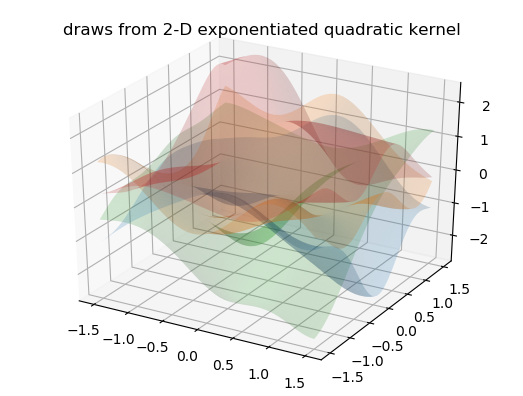

PyObject Text(0.5,0.92,'draws from 2-D exponentiated quadratic kernel')

In [11]:
𝑛ᵤ = 50
𝐮  = (repmat(linspace(-1.5,1.5,𝑛ᵤ)',𝑛ᵤ,1), repmat(linspace(-1.5,1.5,𝑛ᵤ),1,𝑛ᵤ))

for i = 1:4
    k = reshape(sample_nd_kernel(𝐮), 𝑛ᵤ,𝑛ᵤ)
    surf(𝐮[1], 𝐮[2], k ,alpha=0.2)
end
title("draws from 2-D exponentiated quadratic kernel")

## Example Regression Problem

$f = sin(x)$

$y = f(x) + \varepsilon$

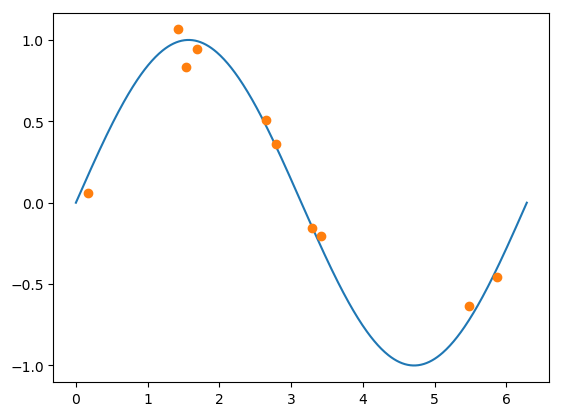

In [12]:
𝑓(𝑥) = sin.(𝑥)

𝑥 = linspace(0,2π,500)
𝑖 = sort(1 + round.(Int, 500 * rand(10))) # random samples indexes
    
σ² = 0.1 ^ 2 #noise variance

𝑢 = 𝑥[𝑖]                         # random sample input
𝑦 = 𝑓(𝑢) + sqrt.(σ²) * randn(10) # noisy sample evaluations

plot(𝑥,𝑓(𝑥),"-",𝑢,𝑦,"o");

### Plotting Utility

In [13]:
function plot_gp_posterior(μ, Σ)
    figure(figsize=(16,6))

    subplot(121)

    plot(𝑥,𝑓(𝑥),"-",𝑢,𝑦,"o");
    plot(𝑥,μ,"--")

    fill_between(𝑥,
                 μ - 1.96*sqrt.(diag(Σ)), 
                 μ + 1.96*sqrt.(diag(Σ)), alpha=0.5)

    ylim(-1.6,1.6)
    title("mean function with 95% credible region")

    # Sample GP posterior
    𝑛ₛ = 100

    samples = sample_posterior(μ,Σ,n=𝑛ₛ)

    subplot(122)

    for i = 1:𝑛ₛ
        plot(𝑥, samples[i],"k", alpha=0.2)
    end

    ylim(-1.6,1.6)
    title("Samples from GP posterior")
end 

plot_gp_posterior (generic function with 1 method)

### GP Regression with RBF kernel

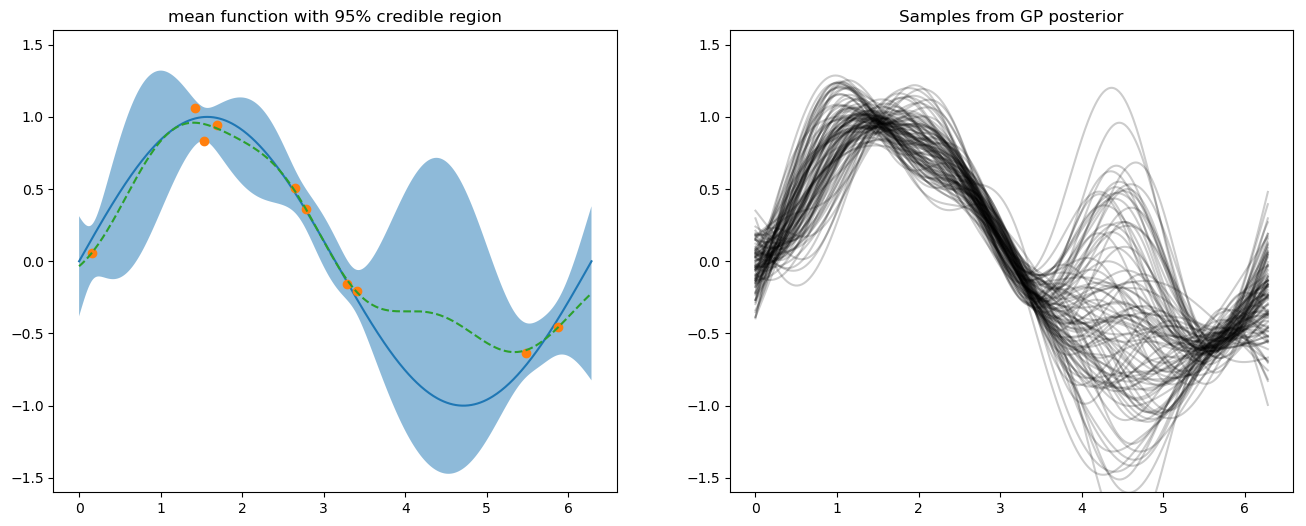

PyObject Text(0.5,1,'Samples from GP posterior')

In [14]:
params = Dict("lengthscale" => 1.0, "variance" => 0.5)
    
# generate prediction function
gp_predict = trained_gp(𝑢, 𝑦, 𝑘=kern_rbf,
                              σ²= σ²,
                              θ = params)

μ,Σ = gp_predict(𝑥)
plot_gp_posterior(μ,Σ)

### GP Regression with Matern kernels

#### Exponential

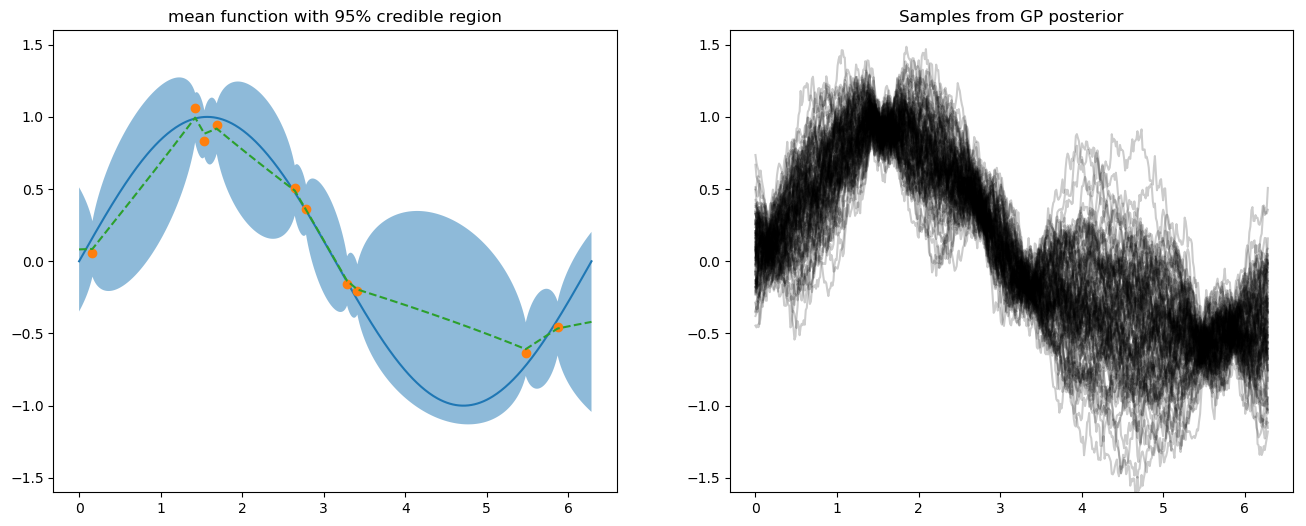

PyObject Text(0.5,1,'Samples from GP posterior')

In [15]:
params = Dict("nu" => 0.5, "lengthscale" => 4.0, "variance" => 0.5)
    
# generate prediction function
gp_predict = trained_gp(𝑢, 𝑦, 𝑘=kern_matern,
                              σ²= σ²,
                              θ = params)

μ,Σ = gp_predict(𝑥)
plot_gp_posterior(μ,Σ)

#### $\nu = \frac{3}{2}$

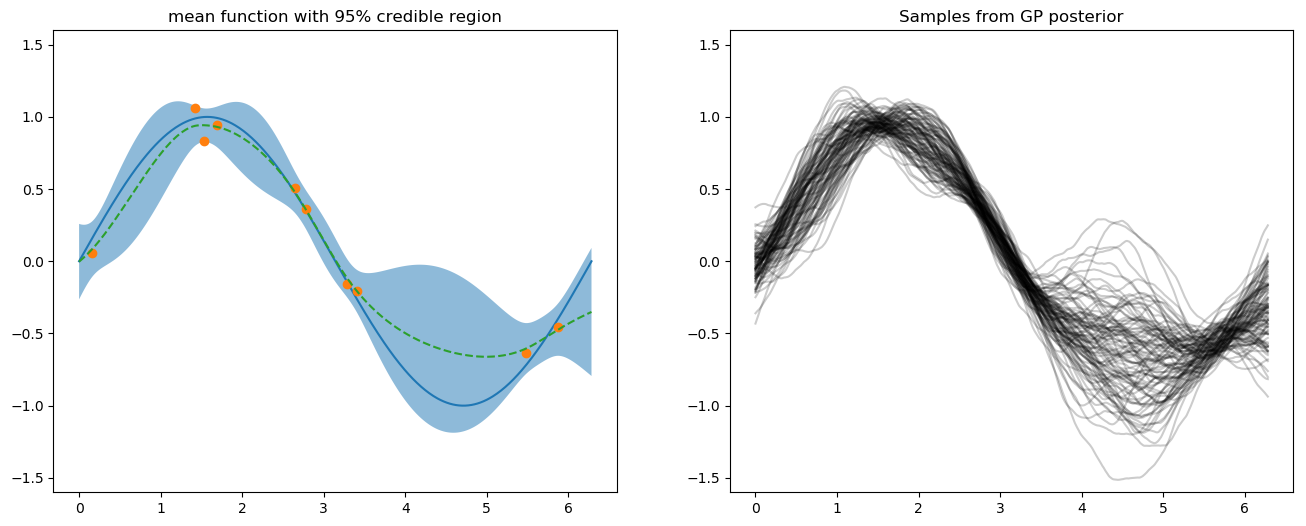

PyObject Text(0.5,1,'Samples from GP posterior')

In [16]:
params = Dict("nu" => 1.5, "lengthscale" => 2.0, "variance" => 0.5)
    
# generate prediction function
gp_predict = trained_gp(𝑢, 𝑦, 𝑘=kern_matern,
                              σ²= σ²,
                              θ = params)

μ,Σ = gp_predict(𝑥)
plot_gp_posterior(μ,Σ)

#### $\nu  = \frac{5}{2}$

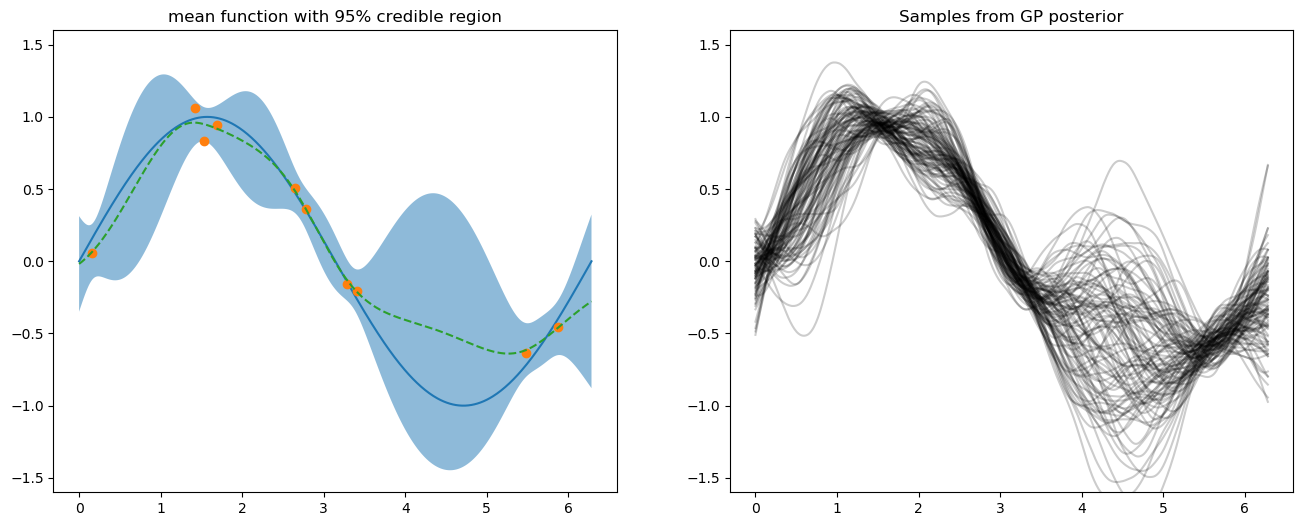

PyObject Text(0.5,1,'Samples from GP posterior')

In [17]:
params = Dict("nu" => 2.5, "lengthscale" => 1.0, "variance" => 0.5)
    
# generate prediction function
gp_predict = trained_gp(𝑢, 𝑦, 𝑘=kern_matern,
                              σ²= σ²,
                              θ = params)

μ,Σ = gp_predict(𝑥)
plot_gp_posterior(μ,Σ)